In [45]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [47]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [48]:
dataf = "../../data/clwbsfencedist.csv"

In [49]:
!sha256sum $dataf

e69dac3b8a4a25ae092e40f7e19e5a7434a2bf860d1c477f6888c02015c786ba  ../../data/clwbsfencedist.csv


In [41]:
df = pd.read_csv(dataf, index_col=None, names=['Distance', '1. CLWB + delayed fence', '2. Delayed CLWB + fence', '3. NT-Store + delayed fence'])
df.index = df['Distance']
del df['Distance']

In [42]:
df.T

Distance,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390
1. CLWB + delayed fence,1391.53,1381.10,1359.85,1338.50,1325.94,1304.09,1287.09,1272.81,1264.40,1259.33,1259.10,1256.95,1253.92,1255.72,1256.84,1255.13,1256.76,1254.51,1256.89,1258.01,1254.27,1254.45,1252.20,1251.40,1249.38,1250.92,1251.74,1251.48,1251.99,1249.06,1251.83,1249.40,1251.84,1257.43,1260.12,1261.02,1256.60,1256.77,1263.09,1257.06
2. Delayed CLWB + fence,1404.70,1392.82,1375.44,1353.27,1335.71,1314.33,1310.20,1303.07,1304.54,1303.82,1301.37,1301.65,1299.74,1301.80,1301.43,1301.35,1294.95,1299.44,1298.29,1300.85,1301.83,1299.91,1299.03,1299.21,1297.29,1299.08,1296.15,1295.45,1292.79,1293.90,1291.42,1292.81,1289.92,1289.48,1289.58,1289.72,1292.15,1297.06,1293.56,1292.04
3. NT-Store + delayed fence,1278.64,1265.54,1241.34,1220.60,1197.57,1190.00,1189.03,1181.89,1179.74,1182.96,1179.90,1179.82,1180.34,1180.63,1183.14,1181.41,1180.05,1182.01,1182.53,1179.21,1179.93,1181.20,1182.21,1181.13,1178.59,1178.94,1189.87,1194.41,1226.70,1196.71,1188.04,1189.93,1189.31,1187.67,1188.75,1190.36,1188.19,1186.83,1191.32,1194.35


In [43]:
Fig.config(14, (8, 2))

[1.  1.1 1.2 1.3 1.4 1.5]
['1.0', '1.1', '1.2', '1.3', '1.4', '1.5']


Plot saved as `plots/pathfinding/clwbsfencedist.png`

Plot saved as `plots/pathfinding/clwbsfencedist.png`

Using pdfcrop on `plots/pathfinding/clwbsfencedist.png` with command `pdfcrop plots/pathfinding/clwbsfencedist.pdf plots/pathfinding/clwbsfencedist.pdf`

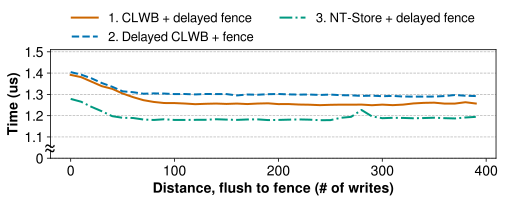

In [44]:
plt.rcParams["font.family"] = "freesans"
ax = (df/1000).plot(**Fig.get_kwargs(bar=False, legend=None, linewidth=2, markersize=5, markevery=2))
f = Fig(ax)
linestyle=['-', '--', '-.']
marker=['s', '^']
color=[CBcdict['Ve'], CBcdict['Bu'], CBcdict['bG']]
for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyle[i])
    line.set_color(color[i])

f.fmt_legend(fontsize=fontsize+2, ncol=2, y_off_scale=1, frameon=False)
f.fmt_label('Distance, flush to fence (# of writes)', 'Time (us)')
f.fmt_grid(axis='y', linestyle='--', linewidth=0.7)

ax.set_ylim(1, 1.51)
ticks = np.float_(np.arange(1, 1.51, 0.1))
ax.set_yticks(ticks)
print(ticks)
ticks = ["%.1f" % val for val in ticks]
print(ticks)
ticks[0] = "0"
ax.set_yticklabels(ticks)

ax.text(-20, 1.02, '~', ha='center')
ax.text(-20, 1.01, '~', ha='center', color='white')
ax.text(-20, 1.00, '~', ha='center')
save_fig('clwbsfencedist')